KNN using Lungcancer 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [2]:
train = pd.read_csv('lungcancer.csv')
train.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
train.shape

(59, 7)

In [4]:
# train = train.drop("Name",axis = 1)
train = train.drop("Surname",axis = 1)
train.head()


,Name,Age,Smokes,AreaQ,Alkhol,Result
0,John,35,3,5,4,1
1,John,27,20,2,5,1
2,Camela,30,0,5,2,0
3,Alex,28,0,8,1,0
4,Diego,68,4,5,6,1


In [5]:
X = train[['Age','Smokes','AreaQ','Alkhol']]
X.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [6]:
Y = train[['Result']]
Y.shape


(59, 1)

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)
X_train.head()

,Age,Smokes,AreaQ,Alkhol
36,59,20,3,4
40,50,20,2,4
24,77,3,2,6
10,33,4,8,0
51,44,30,1,6


In [8]:
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)
for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors = 7)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    print(f"K = {k}, Accuracy = {accuracy}")

K = 1, Accuracy = 0.9166666666666666
K = 2, Accuracy = 0.9166666666666666
K = 3, Accuracy = 0.9166666666666666
K = 4, Accuracy = 0.9166666666666666
K = 5, Accuracy = 0.9166666666666666
K = 6, Accuracy = 0.9166666666666666
K = 7, Accuracy = 0.9166666666666666
K = 8, Accuracy = 0.9166666666666666
K = 9, Accuracy = 0.9166666666666666


In [9]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.9166666666666666

KNN using Iris

In [10]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.drop(['Id'], axis=1, inplace=True)

In [12]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
df.shape

(150, 5)

In [14]:
X = df.iloc[:,:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:

Y = df["Species"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=1)

In [17]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=12)

In [18]:
y_pred = knn.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test,y_pred)
accuracy


0.9666666666666667

Plotting the curve with various k values

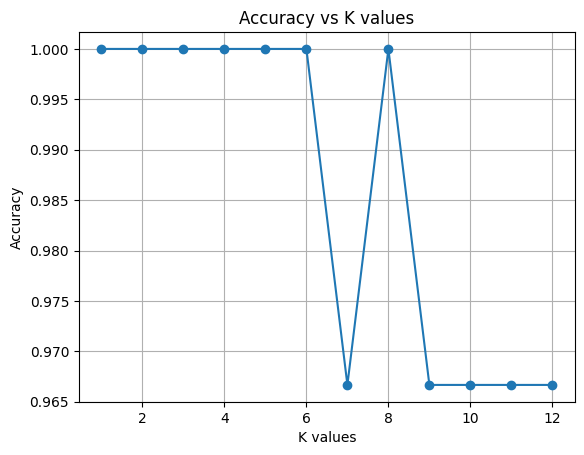

In [20]:
acc = []
k_values = np.arange(1,13)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_no = accuracy_score(y_test,y_pred)
    acc.append(accuracy_no)
plt.plot(k_values,acc,marker = 'o')
plt.title("Accuracy vs K values")
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


    

In [21]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

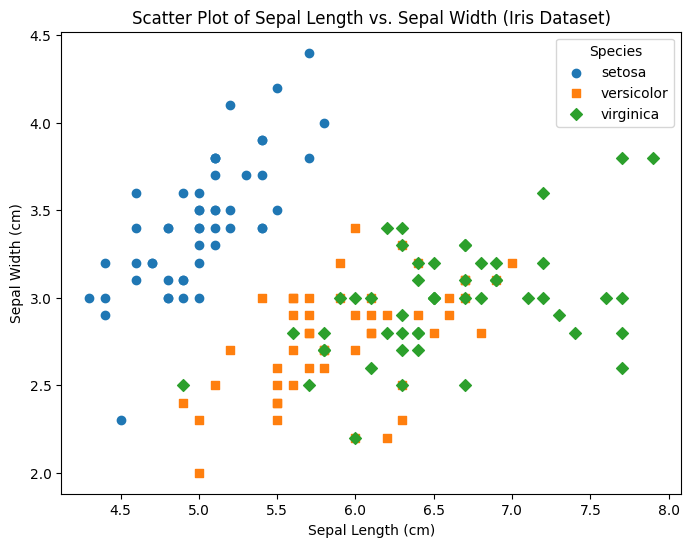

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn to load the Iris dataset

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Scatter plot using Matplotlib
plt.figure(figsize=(8, 6))

# Plot for setosa
plt.scatter(iris[iris['species'] == 'setosa']['sepal_length'], 
            iris[iris['species'] == 'setosa']['sepal_width'], 
             label = 'setosa',marker='o')

# Plot for versicolor
plt.scatter(iris[iris['species'] == 'versicolor']['sepal_length'], 
            iris[iris['species'] == 'versicolor']['sepal_width'], 
            label='versicolor', marker='s')

# Plot for virginica
plt.scatter(iris[iris['species'] == 'virginica']['sepal_length'], 
            iris[iris['species'] == 'virginica']['sepal_width'], 
            label='virginica', marker='D')

# Set plot title and axis labels
plt.title('Scatter Plot of Sepal Length vs. Sepal Width (Iris Dataset)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Add a legend
plt.legend(title='Species')

# Display the plot
plt.show()


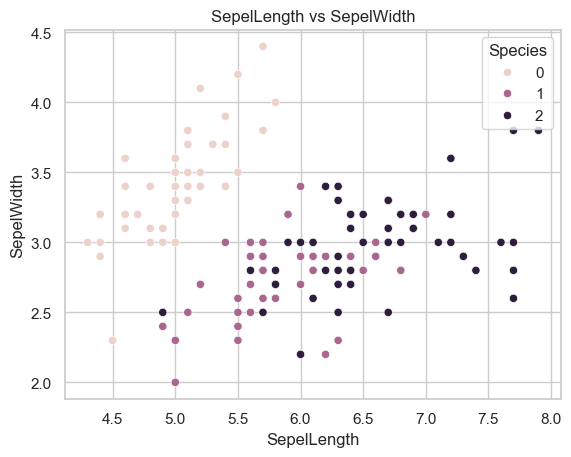

In [23]:
import seaborn as sns

sns.set(style='whitegrid')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue="Species", data=df)
plt.title("SepelLength vs SepelWidth")
plt.xlabel('SepelLength')
plt.ylabel('SepelWidth')
plt.show()

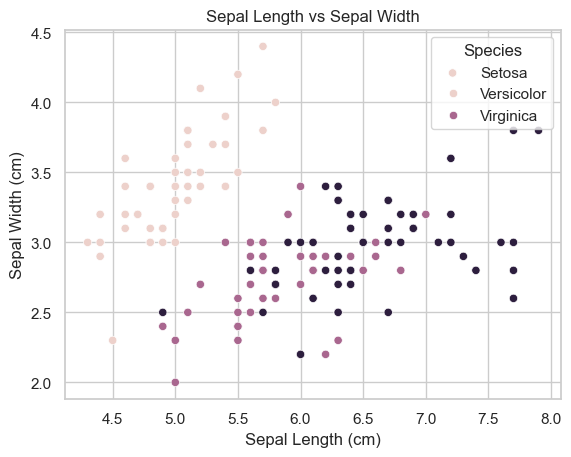

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the Iris dataset
# If your DataFrame has columns named 'SepalLengthCm', 'SepalWidthCm', and 'Species'
# Replace these names with the correct column names in your DataFrame

# Mapping numerical codes to species names
species_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

sns.set(style='whitegrid')
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue="Species", data=df)

# Set title and labels
plt.title("Sepal Length vs Sepal Width")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Add legend with species names
plt.legend(title='Species', labels=[species_mapping[code] for code in df['Species'].unique()])

plt.show()
